# importing libraries

In [330]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# importing and exploring the Data 

In [331]:
dataset = pd.read_excel('data.xlsx')

In [332]:
data = dataset.copy()


In [333]:
data.head()

,Column1,Start Time,Playtime,Effective Playtime,Interruptions,Join Time,Buffer Ratio,CDN Node Host,Connection Type,Device,...,End of Playback Status,User_ID_N,Title_N,Program_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
0,0,2022-07-12 00:00:14,11,10,0,0.879,0.0,NaN,Ethernet-100,Android TV,...,On Stop,564,784,0,16,64,2672,3,263,0
1,1,2022-07-12 00:00:38,73,72,0,1.170,0.0,NaN,WiFi-5,Android TV,...,On Stop,480,1,0,13,63,2672,3,76,0
2,2,2022-07-12 00:02:02,21,20,0,1.133,0.0,NaN,WiFi-5,Android TV,...,On Stop,346,786,0,13,63,2672,3,76,0
3,3,2022-07-12 00:02:24,1,0,0,0.000,0.0,NaN,WiFi-5,Android TV,...,On Stop,346,997,0,13,63,2672,3,76,0
4,4,2022-07-12 00:02:25,1,0,0,0.000,0.0,NaN,WiFi-5,Android TV,...,On Stop,346,997,0,13,63,2672,3,76,0


In [334]:
data.shape

(102256, 33)

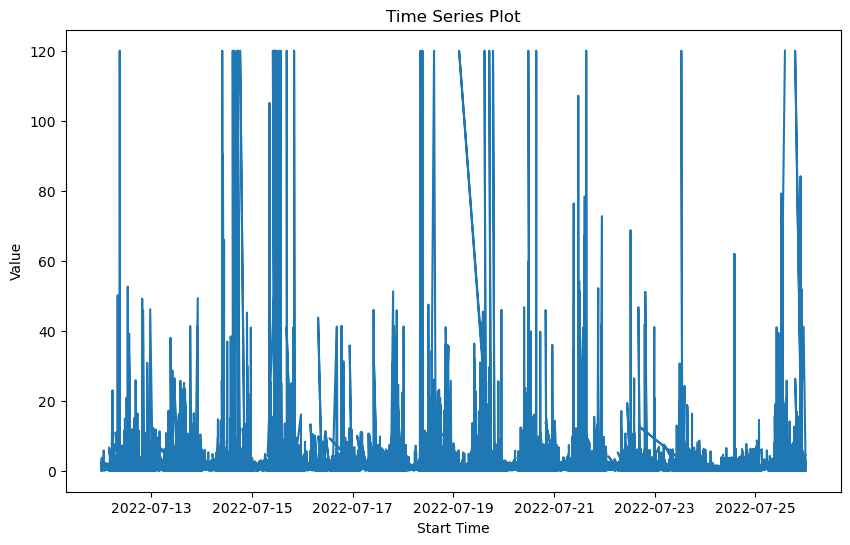

In [335]:
plt.figure(figsize=(10, 6))
plt.plot(data['Start Time'], data['Join Time'])
plt.title('Time Series Plot')
plt.xlabel('Start Time')
plt.ylabel('Value')
plt.show()


In [336]:
print(data.columns.values)

['Column1' 'Start Time' 'Playtime' 'Effective Playtime' 'Interruptions'
 'Join Time' 'Buffer Ratio' 'CDN Node Host' 'Connection Type' 'Device'
 'Device Type' 'Browser' 'Browser Version' 'OS' 'OS Version' 'Device ID'
 'Happiness Value' 'Happiness Score' 'Playback Stalls'
 'Startup Error (Count)' 'Latency' 'End Time' 'Crash Status'
 'End of Playback Status' 'User_ID_N' 'Title_N' 'Program_N'
 'Device_Vendor_N' 'Device_Model_N' 'Content_TV_Show_N' 'Country_N'
 'City_N' 'Region_N']


In [337]:
data.dtypes

Column1                            int64
Start Time                datetime64[ns]
Playtime                           int64
Effective Playtime                 int64
Interruptions                      int64
Join Time                        float64
Buffer Ratio                     float64
CDN Node Host                     object
Connection Type                   object
Device                            object
Device Type                       object
Browser                           object
Browser Version                   object
OS                                object
OS Version                        object
Device ID                         object
Happiness Value                   object
Happiness Score                  float64
Playback Stalls                  float64
Startup Error (Count)              int64
Latency                            int64
End Time                  datetime64[ns]
Crash Status                      object
End of Playback Status            object
User_ID_N       

In [338]:
df=data.drop(columns=['Column1','Content_TV_Show_N','Device ID','Happiness Score','User_ID_N'])

In [339]:
df=data.copy()

In [340]:

df['Start Time'] = pd.to_datetime(df['Start Time'])
data_collection_duration = df['Start Time'].max() - df['Start Time'].min()
print(data_collection_duration)

13 days 23:59:42


In [341]:
print(df.describe())


           Column1       Playtime  Effective Playtime  Interruptions  \
count  102256.0000  102256.000000       102256.000000  102256.000000   
mean    51127.5000     328.965479          288.338454       0.099544   
std     29518.9089    1799.357645         1697.491699      12.007473   
min         0.0000       0.000000            0.000000       0.000000   
25%     25563.7500       4.000000            1.000000       0.000000   
50%     51127.5000      22.000000           17.000000       0.000000   
75%     76691.2500      90.000000           75.000000       0.000000   
max    102255.0000   86404.000000        86402.000000    3786.000000   

           Join Time   Buffer Ratio  Happiness Score  Playback Stalls  \
count  102256.000000  102256.000000    102256.000000    102256.000000   
mean        1.158462       0.261755         5.166843         0.003805   
std         2.843884       3.568773         4.381398         0.202198   
min         0.000000       0.000000        -1.000000       

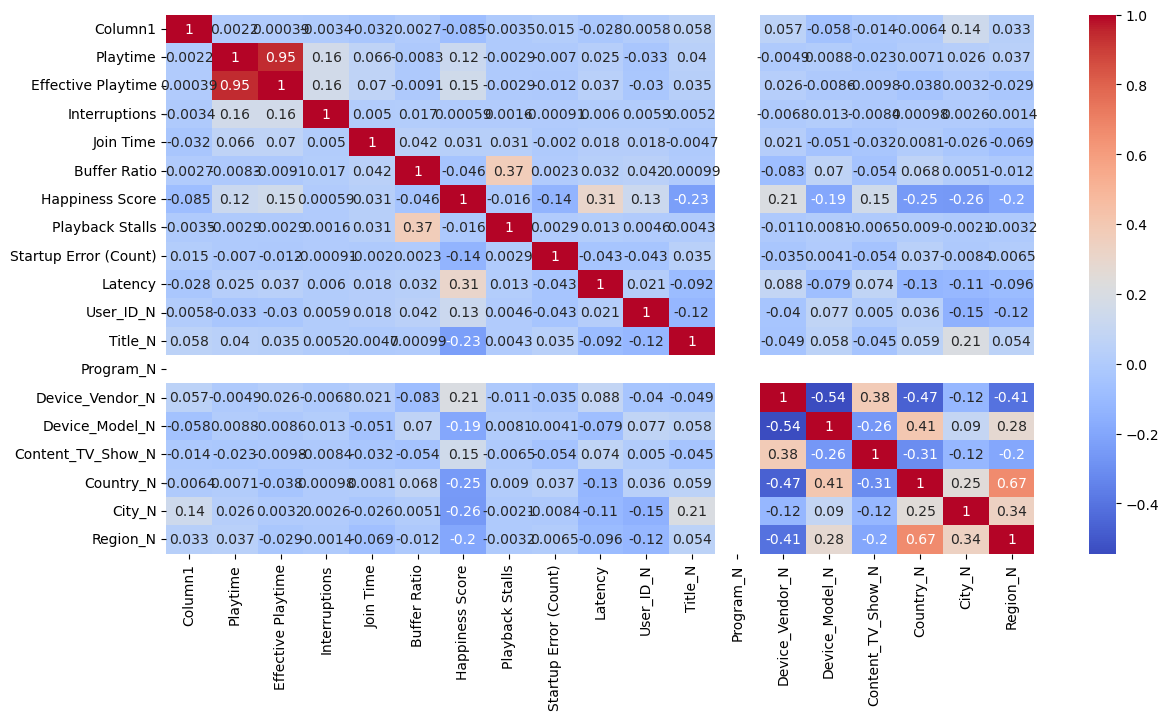

In [342]:
plt.figure(figsize=(14,7))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')
plt.show()

In [343]:
df=df.drop(columns=['Program_N'])

In [344]:
df.isnull().sum(axis = 0)

Column1                        0
Start Time                     0
Playtime                       0
Effective Playtime             0
Interruptions                  0
Join Time                      0
Buffer Ratio                   0
CDN Node Host              65277
Connection Type                0
Device                         0
Device Type                    0
Browser                        0
Browser Version              845
OS                             0
OS Version                     0
Device ID                      0
Happiness Value                1
Happiness Score                0
Playback Stalls                0
Startup Error (Count)          0
Latency                        0
End Time                       0
Crash Status              100411
End of Playback Status         1
User_ID_N                      0
Title_N                        0
Device_Vendor_N                0
Device_Model_N                 0
Content_TV_Show_N              0
Country_N                      0
City_N    

In [345]:
df.drop(columns=['CDN Node Host'], inplace=True)
df.drop(columns=['Crash Status'], inplace=True)

browser_version_mode = df['Browser Version'].mode().iloc[0]
df['Browser Version'].fillna(browser_version_mode, inplace=True)
df.dropna(subset=['Happiness Value', 'End of Playback Status',], inplace=True)
print(df.isnull().sum(axis=0))

Column1                   0
Start Time                0
Playtime                  0
Effective Playtime        0
Interruptions             0
Join Time                 0
Buffer Ratio              0
Connection Type           0
Device                    0
Device Type               0
Browser                   0
Browser Version           0
OS                        0
OS Version                0
Device ID                 0
Happiness Value           0
Happiness Score           0
Playback Stalls           0
Startup Error (Count)     0
Latency                   0
End Time                  0
End of Playback Status    0
User_ID_N                 0
Title_N                   0
Device_Vendor_N           0
Device_Model_N            0
Content_TV_Show_N         0
Country_N                 0
City_N                    0
Region_N                  0
dtype: int64


In [346]:
df.isnull().sum(axis = 0)

Column1                   0
Start Time                0
Playtime                  0
Effective Playtime        0
Interruptions             0
Join Time                 0
Buffer Ratio              0
Connection Type           0
Device                    0
Device Type               0
Browser                   0
Browser Version           0
OS                        0
OS Version                0
Device ID                 0
Happiness Value           0
Happiness Score           0
Playback Stalls           0
Startup Error (Count)     0
Latency                   0
End Time                  0
End of Playback Status    0
User_ID_N                 0
Title_N                   0
Device_Vendor_N           0
Device_Model_N            0
Content_TV_Show_N         0
Country_N                 0
City_N                    0
Region_N                  0
dtype: int64

# preprocessing the data 

In [347]:
df1 = df.copy()

In [348]:
numerical_v = df1._get_numeric_data()
numerical_c = numerical_v.columns
scaler = MinMaxScaler()
df1[numerical_c] = scaler.fit_transform(df1[numerical_c])
numerical_v = df1._get_numeric_data()


In [349]:
numerical_v

,Column1,Playtime,Effective Playtime,Interruptions,Join Time,Buffer Ratio,Happiness Score,Playback Stalls,Startup Error (Count),Latency,User_ID_N,Title_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
0,0.000000,0.000127,0.000116,0.000000,0.007325,0.00000,0.7393,0.0,0.0,0.054257,0.806867,0.478632,0.666667,0.392638,0.973052,0.214286,0.649383,0.0
1,0.000010,0.000845,0.000833,0.000000,0.009750,0.00000,0.9399,0.0,0.0,0.052946,0.686695,0.000611,0.541667,0.386503,0.973052,0.214286,0.187654,0.0
2,0.000020,0.000243,0.000231,0.000000,0.009442,0.00000,0.6999,0.0,0.0,0.053052,0.494993,0.479853,0.541667,0.386503,0.973052,0.214286,0.187654,0.0
3,0.000029,0.000012,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0.000000,0.494993,0.608669,0.541667,0.386503,0.973052,0.214286,0.187654,0.0
4,0.000039,0.000012,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0.000000,0.494993,0.608669,0.541667,0.386503,0.973052,0.214286,0.187654,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102251,0.999961,0.176867,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0.000000,0.815451,0.918193,0.083333,0.938650,0.886380,0.214286,0.906173,0.0
102252,0.999971,0.191912,0.191905,0.000000,0.008250,0.00000,0.9998,0.0,0.0,0.050604,0.679542,0.619048,0.541667,0.386503,0.973052,0.214286,0.096296,0.0
102253,0.999980,0.244966,0.000000,0.000000,0.000000,0.00000,0.0000,0.0,0.0,0.000000,0.356223,0.656899,0.666667,0.251534,0.973052,0.214286,0.138272,0.0
102254,0.999990,0.753692,0.753628,0.000528,0.050858,0.00001,0.7465,0.0,0.0,0.076639,0.889843,0.877289,0.333333,0.969325,0.252731,0.214286,0.138272,0.0


In [350]:
df2 = df1.copy()

In [351]:
df2['Happiness Value'].head(10)

0     Smile (7-8.5)
1    Happy (8.5-10)
2     Neutral (5-7)
3       Angry (0-3)
4       Angry (0-3)
5       Angry (0-3)
6    Happy (8.5-10)
7       Angry (0-3)
8     Smile (7-8.5)
9       Angry (0-3)
Name: Happiness Value, dtype: object

In [352]:
order = ['Angry (0-3)', 'Sad (3-5)', 'Neutral (5-7)', 'Smile (7-8.5)', 'Happy (8.5-10)']
print(f"\033[31m{df2['Happiness Value'].unique()}\033[31m")
encoder = OrdinalEncoder(categories=[order])
encoder.fit(df2[['Happiness Value']])
df2['Happiness Value'] = encoder.transform(df2[['Happiness Value']])
print(f"\033[32m{df2['Happiness Value'].unique()}\033[32m")

['Smile (7-8.5)' 'Happy (8.5-10)' 'Neutral (5-7)' 'Angry (0-3)'
 'Sad (3-5)']
[3. 4. 2. 0. 1.]


In [353]:
df2['Happiness Value'].head(10)

0    3.0
1    4.0
2    2.0
3    0.0
4    0.0
5    0.0
6    4.0
7    0.0
8    3.0
9    0.0
Name: Happiness Value, dtype: float64

In [354]:
df3=df2.copy()

In [355]:
leb = LabelEncoder()
col= ['Connection Type', 'Device','Device Type', 'Browser', 'Browser Version', 'OS', 'OS Version','End Time',
      'End of Playback Status']
df3[col]= df3[col].apply(leb.fit_transform)
df3

,Column1,Start Time,Playtime,Effective Playtime,Interruptions,Join Time,Buffer Ratio,Connection Type,Device,Device Type,...,End Time,End of Playback Status,User_ID_N,Title_N,Device_Vendor_N,Device_Model_N,Content_TV_Show_N,Country_N,City_N,Region_N
0,0.000000,2022-07-12 00:00:14,0.000127,0.000116,0.000000,0.007325,0.00000,7,1,10,...,0,3,0.806867,0.478632,0.666667,0.392638,0.973052,0.214286,0.649383,0.0
1,0.000010,2022-07-12 00:00:38,0.000845,0.000833,0.000000,0.009750,0.00000,16,1,10,...,1,3,0.686695,0.000611,0.541667,0.386503,0.973052,0.214286,0.187654,0.0
2,0.000020,2022-07-12 00:02:02,0.000243,0.000231,0.000000,0.009442,0.00000,16,1,10,...,2,3,0.494993,0.479853,0.541667,0.386503,0.973052,0.214286,0.187654,0.0
3,0.000029,2022-07-12 00:02:24,0.000012,0.000000,0.000000,0.000000,0.00000,16,1,10,...,3,3,0.494993,0.608669,0.541667,0.386503,0.973052,0.214286,0.187654,0.0
4,0.000039,2022-07-12 00:02:25,0.000012,0.000000,0.000000,0.000000,0.00000,16,1,10,...,4,3,0.494993,0.608669,0.541667,0.386503,0.973052,0.214286,0.187654,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102251,0.999961,2022-07-25 23:06:05,0.176867,0.000000,0.000000,0.000000,0.00000,8,14,8,...,96246,3,0.815451,0.918193,0.083333,0.938650,0.886380,0.214286,0.906173,0.0
102252,0.999971,2022-07-25 22:55:39,0.191912,0.191905,0.000000,0.008250,0.00000,16,1,10,...,96247,3,0.679542,0.619048,0.541667,0.386503,0.973052,0.214286,0.096296,0.0
102253,0.999980,2022-07-25 23:09:33,0.244966,0.000000,0.000000,0.000000,0.00000,16,0,6,...,96248,3,0.356223,0.656899,0.666667,0.251534,0.973052,0.214286,0.138272,0.0
102254,0.999990,2022-07-25 11:47:37,0.753692,0.753628,0.000528,0.050858,0.00001,12,8,3,...,96249,3,0.889843,0.877289,0.333333,0.969325,0.252731,0.214286,0.138272,0.0


### preprocessing 'Start Time'

In [356]:
df3['Start Time'].head(5) 

0   2022-07-12 00:00:14
1   2022-07-12 00:00:38
2   2022-07-12 00:02:02
3   2022-07-12 00:02:24
4   2022-07-12 00:02:25
Name: Start Time, dtype: datetime64[ns]

In [357]:
df3['Start Time'] = pd.to_datetime(df3['Start Time'])
df3 = df3.sort_values('Start Time')
df3.set_index('Start Time', inplace=True)


In [363]:
corr_matrix = df3.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]


C:\Users\souha\AppData\Local\Temp\ipykernel_15244\4057783818.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [364]:
to_drop

['Effective Playtime', 'Browser Version', 'OS', 'OS Version']

In [ ]:
df3 = df.drop(df[to_drop], axis=1)

In [305]:
import pandas as pd
df3.to_pickle("my_preprocessed_data.pkl")